In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## What are the most demanded skills for the top 3 most popular data roles?

# Methodology

1. Clean-up skill column
2. Calculate skill count based on "job_title_short"
3. Caluclate skill percentage
4. Plot final findings

In [3]:
df_CAN = df[df['job_country']=='Canada'].copy() #filtering the canadian data

In [5]:
df_exploded = df_CAN.explode('job_skills') # exploding the skills since in the original data they are in a list and unable to be counted individually

skill_count = df_exploded.groupby(['job_skills','job_title_short']).size() #grouping the data by job_skills showing the count of those skills per job title
df_skills_count = skill_count.reset_index(name='skill_count') # resetting the index to put the series back into a dataframe and naming the count column 'skill_count'

df_skills_count.sort_values(by='skill_count', ascending =False, inplace=True) #sorting the skill count values in descending order and updating the datafram to see the top skills

df_skills_count

,job_skills,job_title_short,skill_count
1215,sql,Data Engineer,3794
949,python,Data Engineer,3567
108,azure,Data Engineer,2217
98,aws,Data Engineer,2030
1171,spark,Data Engineer,1948
...,...,...,...
749,no-sql,Cloud Engineer,1
748,no-sql,Business Analyst,1
671,mattermost,Senior Data Analyst,1
1439,webex,Data Scientist,1


In [7]:
# TO obtain the top 3 jobs with highest skill counts

job_titles = df_skills_count['job_title_short'].unique().tolist() #gives an ordered list by skill count of the job titles

job_titles = sorted(job_titles[:3]) # Of this list, the first 3 job titles are extracted and sorted in alphabetical order

job_titles

['Data Analyst', 'Data Engineer', 'Senior Data Engineer']

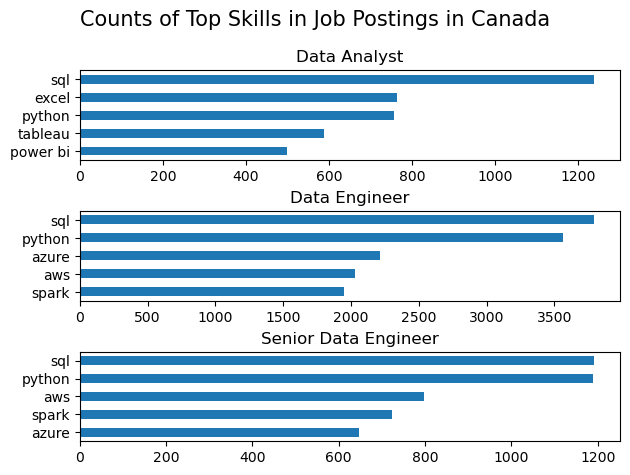

In [ ]:
fig,ax = plt.subplots(len(job_titles),1) # creates a figure and as many subplots as there are job titles in the list created above

for i, job_title in enumerate(job_titles): # for loop to plot each job title in the figure
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings in Canada', fontsize = 15)
fig.tight_layout(h_pad = 0.5)

In [ ]:
df_job_title_count = df_CAN['job_title_short'].value_counts().reset_index(name='jobs_total') #creating a dataframe consisting of the total count of job postings per job title
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,5828
1,Data Analyst,2365
2,Data Scientist,1825
3,Senior Data Engineer,1776
4,Software Engineer,1254
5,Business Analyst,1109
6,Senior Data Scientist,589
7,Machine Learning Engineer,566
8,Senior Data Analyst,435
9,Cloud Engineer,282


In [ ]:
# proceeding to creating percentages to show a more accurate representation of each skill per job title

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short') # using pandas, I merged the skills count and job count dataframes

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total'] #created the percentage column

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,3794,5828,65.099520
1,python,Data Engineer,3567,5828,61.204530
2,azure,Data Engineer,2217,5828,38.040494
3,aws,Data Engineer,2030,5828,34.831846
4,spark,Data Engineer,1948,5828,33.424846
...,...,...,...,...,...
1480,no-sql,Cloud Engineer,1,282,0.354610
1481,no-sql,Business Analyst,1,1109,0.090171
1482,mattermost,Senior Data Analyst,1,435,0.229885
1483,webex,Data Scientist,1,1825,0.054795


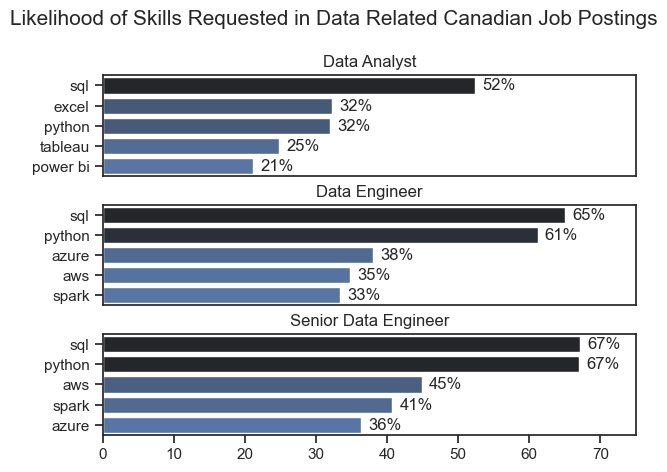

In [ ]:
fig,ax = plt.subplots(len(job_titles),1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles): #having the percentages, I can now use that column to plot as the x-axis using seaborn
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue = 'skill_count', palette = 'dark:b_r')
    
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,75)
    ax[i].legend().set_visible(False)

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1,n,f'{v:.0f}%', va = 'center') #adding the percentages to the end of each bar for visualization and comprehension purposes
    if i!= len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Data Related Canadian Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)